This is an IPython notebook. Each cell has code which can be run independently from what is run in other cells. Once a cell is
run the variables etc are kept and saved and not destroyed from the memory.

In [7]:
print a

1


In [8]:
a = 1

# now go back and the run the first cell. 
# To run a cell, click inside the cell and press Shift + Enter

### Session 1 - Basic visualisations and EDA

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline

In [13]:
df = pd.read_csv('train_csv.csv')
df.reset_index(drop=True, inplace=True)
df.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


-1 has been used in the dataset to designated missing values.

None of the columns have -1 as a possible valid value.

Hence we will safely do a mass replace.

In [14]:
## Setting the data which was -1 as null object.
for col in df.columns:
    df.loc[df[col] == -1, col] = np.nan

In [16]:
## To get help related to any Python method, module etc. Write the module or methods name on a new line followed by a ? and
## execute.
col?

In [17]:
## To know about methods in a cell. Write df. and press Tab. 
## It was show the list of methods inside df.
## To get help for the method, type df.method_name?

df.

In [18]:
#we have missing values in our dataframe? What all columns got loaded?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
ID                       3998 non-null float64
Salary                   3998 non-null float64
DOJ                      3998 non-null object
DOL                      3998 non-null object
Designation              3998 non-null object
JobCity                  3998 non-null object
Gender                   3998 non-null object
DOB                      3998 non-null object
10percentage             3998 non-null float64
10board                  3998 non-null object
12graduation             3998 non-null float64
12percentage             3998 non-null float64
12board                  3998 non-null object
CollegeID                3998 non-null float64
CollegeTier              3998 non-null float64
Degree                   3998 non-null object
Specialization           3998 non-null object
collegeGPA               3998 non-null float64
CollegeCityID            3998 non-null float64
CollegeCit

In [19]:
## For now I am going to ignore Computer Programming, Electrical and etc scores as they are any reflected in the domain scores.
## Also removing DOJ etc.
## Removing ID
## Removing college city and job city for basic model.

basic_cols = [u'Salary', u'Gender', u'10percentage', u'10board', 
          u'12graduation', u'12percentage', u'12board', u'CollegeID', 
          u'CollegeTier', u'Degree', u'Specialization', u'collegeGPA', u'CollegeCityTier', u'CollegeState', 
          u'GraduationYear', u'English', u'Logical', u'Quant', u'Domain', u'conscientiousness', 
          u'agreeableness', u'extraversion', u'nueroticism', u'openess_to_experience', 'Designation']

In [20]:
data = df[basic_cols]

In [21]:
## Analysis of the numerical columns.
data.describe()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3752.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,513.378189,0.609525,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,122.302332,0.273159,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,120.000000,0.002750,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,430.000000,0.376060,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.649390,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,1.995300,1.904800,2.535400,3.352500,1.822400


In [22]:
## Lets see the top 5 values in each columns - this will help get a feel of the non-numeric columns too like city etc.
## Which are are non-numerical columns? All columns minus numerical columns
non_num_cols = list(set(data.columns) - set(data._get_numeric_data().columns))

for col in non_num_cols:
    print col,'has unique values:' , data[col].unique().shape[0]
    print data[col].value_counts().iloc[:5]
    print '\n'

Degree has unique values: 4
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64


Specialization has unique values: 46
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
Name: Specialization, dtype: int64


Designation has unique values: 419
software engineer     539
software developer    265
system engineer       205
programmer analyst    139
systems engineer      118
Name: Designation, dtype: int64


Gender has unique values: 2
m    3041
f     957
Name: Gender, dtype: int64


CollegeState has unique values: 26
Uttar Pradesh    915
Karnataka        370
Tamil Nadu       367
Telangana        319
Maharashtra      262
Name: CollegeState, dtype: int64


12board has unique values: 340
cbse           1400
state board    1254
0             

In [23]:
### Cleaning CGPA 
data.collegeGPA.describe()

count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

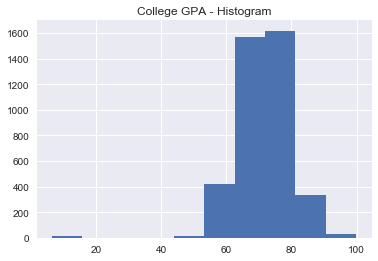

In [25]:
data.collegeGPA.hist(bins=10)
plt.title('College GPA - Histogram')

In [26]:
#We can notice there a few people who are below ten. It seems like an anamoly. There aren't a lot of students in betweem that
# bar and the 40 to 60 bar. It could be that the dataset has CGPA which also belong the the 0-10 scale and students didn't 
# scale it to 100. Different of scales has an issue as a the model would think a 9.98 CGPA is extremely bad in the current
# scale but it possibly was a good cgpa. We will scale the grades below the 10 scale to a 100 scale.

data.loc[data.collegeGPA <=10, 'collegeGPA'] = data.collegeGPA*10

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
data.collegeGPA.hist?
#plt.xlim(0,100)

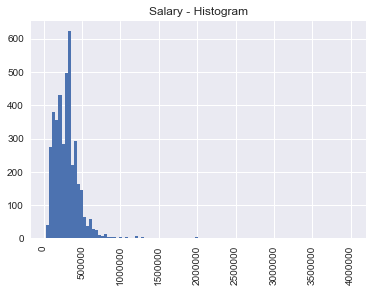

In [28]:
## So we want to predict Salary
## But, how is the salary distibuted

data.Salary.hist(xrot =90, bins = 100)
plt.title('Salary - Histogram')

## You can notice longtail. What is longtail?

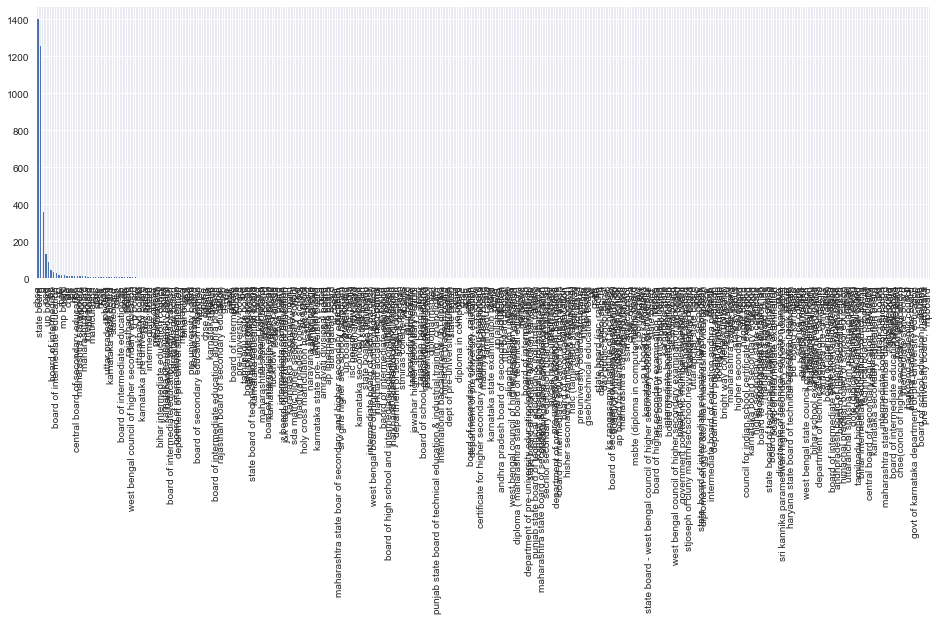

In [31]:
## How does 12 board look like?
data['12board'].value_counts().plot(kind='bar', figsize=(16,5))
## 12 board follows a long tail

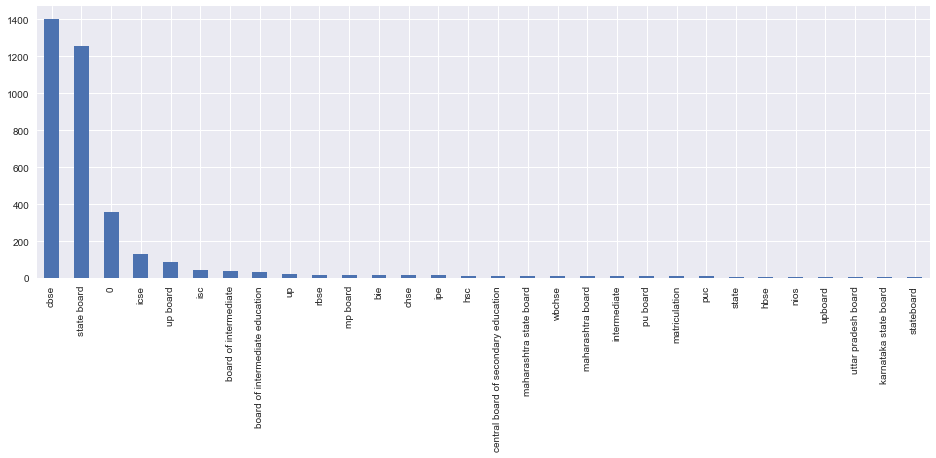

In [21]:
## How does 12 board look like for top 30 values?
data['12board'].value_counts()[:30].plot(kind='bar', figsize=(16,5))
## You can see the main primary boards have peaks and then there is a long tail of boards which are not always unique.
## eg. up, upboard, up board and uttar pradesh board all mean the same thing but are represented differently.
## We could have cleaned this data using some scripts and added this column to our analysis but for now we will not use this.

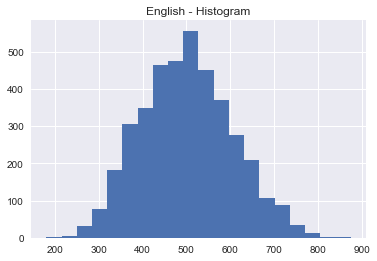

In [22]:
## How do English scores of candidates look?
data.English.hist(bins=20)
plt.title('English - Histogram')

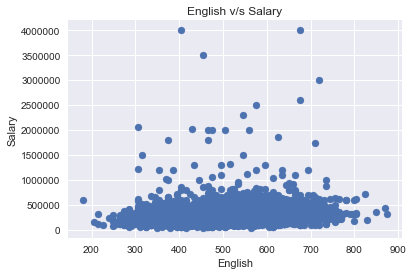

In [23]:
## But how does English affect Salary?
## What scores of English get what kinds of Salaries?
## Do higher english scores get you higher salaries?
## Is it after any particular score, that it starts to stop mattering?
sns.set_style('darkgrid')
plt.scatter(data.English, data.Salary)
plt.title('English v/s Salary')
plt.xlabel('English')
plt.ylabel('Salary')

In [24]:
# Similarly for Logical Ability
# Can you fill in the missing code?
plt.scatter(    ,   )
plt.title('Logical v/s Salary')

SyntaxError: invalid syntax (<ipython-input-24-db3ab0caa82e>, line 3)

In [ ]:
## Is Gender playing a role in deciding Salary? How do you visualise this relationship  between a category (Gender)
## and Salary?

(0, 800000)

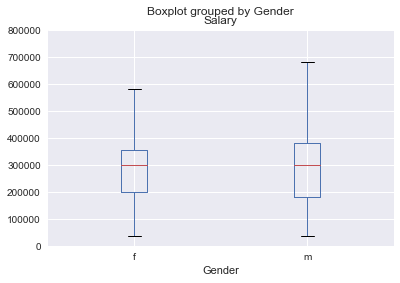

In [25]:
data.boxplot(by='Gender', column='Salary')
plt.ylim(0,800000)
## Note read line in median.
## How to read this plot?

In [ ]:
############ Play area for session one ############
## Why don't you plot a few scatters or hists etc for different variables?
data[''].hist()

In [ ]:
plt.scatter(data[''], data[''])

###  Session 2  - Let's make our first model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# We are interested in predicting Salary
data.columns
# For now, we will try to predict using only these columns:
X_col = [u'Gender', u'10percentage', u'12graduation', u'12percentage', u'CollegeTier',
     u'Degree', u'collegeGPA', u'CollegeCityTier', u'GraduationYear', u'English', u'Logical', 
     u'Quant', u'Domain', u'conscientiousness', u'agreeableness', u'extraversion', u'nueroticism', u'openess_to_experience']
y_col = 'Salary'

df_exp = df[X_col + [y_col]]

In [35]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 19 columns):
Gender                   3998 non-null object
10percentage             3998 non-null float64
12graduation             3998 non-null float64
12percentage             3998 non-null float64
CollegeTier              3998 non-null float64
Degree                   3998 non-null object
collegeGPA               3998 non-null float64
CollegeCityTier          3998 non-null float64
GraduationYear           3998 non-null float64
English                  3998 non-null float64
Logical                  3998 non-null float64
Quant                    3998 non-null float64
Domain                   3752 non-null float64
conscientiousness        3998 non-null float64
agreeableness            3998 non-null float64
extraversion             3998 non-null float64
nueroticism              3998 non-null float64
openess_to_experience    3998 non-null float64
Salary                   3998 non-null float64
dt

In [36]:
##Domain has a few missing values, many models can't handle missing values. For the sake of similicty we will use frame with
## no missing values. We may lose some rows (the ones that have missing values)
df_exp.dropna(subset=X_col, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
##  We lost a few rows, but it's okay. We could have let go of the domain column too, but we believe it could be important
## in predicting the salary
df_exp.shape

(3752, 19)

In [38]:
X = df_exp[X_col]
y = df_exp.Salary

In [32]:
# How does one row of X look?
X.loc[0]

Gender                             f
10percentage                    84.3
12graduation                    2007
12percentage                    95.8
CollegeTier                        2
Degree                   B.Tech/B.E.
collegeGPA                        78
CollegeCityTier                    0
GraduationYear                  2011
English                          515
Logical                          585
Quant                            525
Domain                      0.635979
conscientiousness             0.9737
agreeableness                 0.8128
extraversion                  0.5269
nueroticism                   1.3549
openess_to_experience        -0.4455
Name: 0, dtype: object

In [39]:
# Not all columns have numerical values. Not all models can handle categorical variables directly. For example, LinearRegression,
# requires completely numerical input. So we will need to convert the categorical varibles to some numerical values.
# Gender and Degree need our attention.

# For Gender we will convert m --> 1 and f to --> 0 
from sklearn.preprocessing import LabelEncoder
X.loc[X.Gender == 'm', 'Gender'] = 1
X.loc[X.Gender == 'f', 'Gender'] = 0

print X.Gender.unique()

# For Degree, which has 4 unique values, we will get 4 new columns representing each of the types of Degrees. If a candidate is
# from any one of the degrees then that columns will have the value 1 (like ON) and the rest columns will be 0 (OFF).

print 'Old shape', X.shape

X = pd.get_dummies(X, columns=['Degree'])

print 'New shape', X.shape

[0 1]
Old shape (3752, 18)
New shape (3752, 21)


In [40]:
## Check the last four new columns
X.columns

Index([u'Gender', u'10percentage', u'12graduation', u'12percentage',
       u'CollegeTier', u'collegeGPA', u'CollegeCityTier', u'GraduationYear',
       u'English', u'Logical', u'Quant', u'Domain', u'conscientiousness',
       u'agreeableness', u'extraversion', u'nueroticism',
       u'openess_to_experience', u'Degree_B.Tech/B.E.',
       u'Degree_M.Sc. (Tech.)', u'Degree_M.Tech./M.E.', u'Degree_MCA'],
      dtype='object')

In [41]:
# How does one row of X look now?
X.loc[0]

Gender                          0
10percentage                 84.3
12graduation                 2007
12percentage                 95.8
CollegeTier                     2
collegeGPA                     78
CollegeCityTier                 0
GraduationYear               2011
English                       515
Logical                       585
Quant                         525
Domain                   0.635979
conscientiousness          0.9737
agreeableness              0.8128
extraversion               0.5269
nueroticism                1.3549
openess_to_experience     -0.4455
Degree_B.Tech/B.E.              1
Degree_M.Sc. (Tech.)            0
Degree_M.Tech./M.E.             0
Degree_MCA                      0
Name: 0, dtype: object

In [47]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl = mdl.fit(X, y)
## thats it, you've trained your linear regression

In [48]:
## But how does it do? 
explained_variance = mdl.score(X, y)
print explained_variance
## Note we are predicting the model on the data it  used to learn in the first place.

0.154147823408


In [45]:
## What score --> 0.15 mean? In sklearn regression models, scores are r^2 values. Which define the percentage of variange 
## explained. Root of the same number gives r, which is the correlation between the predicted and the observed values.
correlation = np.sqrt(explained_variance)
print correlation

0.392616636693


In [49]:
## What are some other metrics for model eval?
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y, mdl.predict(X))
print 'Mean squared error is', mse
print 'Root Mean squared error is', np.sqrt(mse)
print 'Mean Absolute error is', mean_absolute_error(y, mdl.predict(X))
## These give you a better intuitive sense of how off you are on an average in every prediction.

Mean squared error is 36995044581.7
Root Mean squared error is 192340.959189
Mean Absolute error is 105239.419823


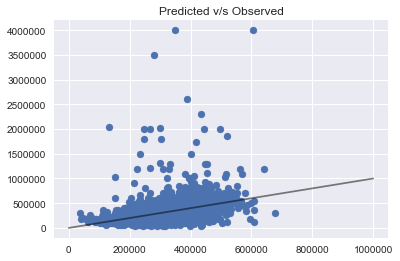

In [50]:
## What exactly is this corerlation about?
predicted_values = mdl.predict(X)
plt.scatter(predicted_values, y)
plt.title('Predicted v/s Observed')
plt.plot([0,1000000],[0,1000000], c = 'black', alpha =0.5)

(0, 1000000)

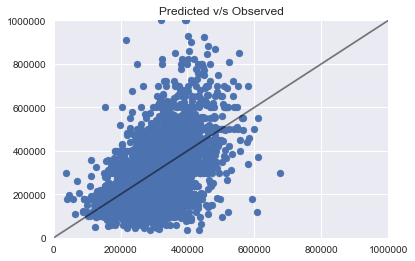

In [51]:
## A little zoomed in?
plt.scatter(predicted_values, y)
plt.title('Predicted v/s Observed')
plt.plot([0,1000000],[0,1000000], c = 'black', alpha =0.5)
plt.xlim((0,1000000))
plt.ylim((0,1000000))

In [52]:
## Let's use a decision tree. 
from sklearn.tree import DecisionTreeRegressor
## Note how each model in sklearn uses the same api ie. fit() and predict()
mdl = DecisionTreeRegressor()
mdl = mdl.fit(X, y)
mdl.score(X, y)

1.0

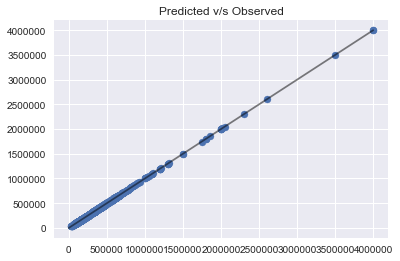

In [53]:
predicted_values = mdl.predict(X)
plt.scatter(predicted_values, y)
plt.title('Predicted v/s Observed')

plt.plot([0,4000000],[0,4000000], c = 'black', alpha=0.5)

In [ ]:
# What? So the r is 1 !!
# The decision tree was able to preict almost every possible values. Imagine a tree with
#leaves for each data row. That's great! We have a model which predict salary with amazing accuracy. 
#But wait, we just trained the model on that data, it ought to know how to predict. But linearregression didn't give an amazing
#accuracy even on the same data. 
# Our DT, had the flexiblity to train meld itself exactly as per the training samples, while the linear regression has the
#constraint to be a line and so it did the best it could do as a line.
#Nonetheless, we trained our model completely to the dataset. But our motive is to predict the grade for samples the model 
#doesn't know about, but does guesses/predicts based on his past learnings.
# So what we need to do is test our models on unseen data. We will split our current dataset into 2 parts - train and test.

In [44]:
print 'Current dataset size', X.shape

Current dataset size (3752, 21)


In [56]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## Get it? What happened? We made 4 sets.
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(3001, 21)
(751, 21)
(3001,)
(751,)


In [57]:
## lets train the dt on train set.
#we train on the train set which is 3001 samples.
mdl = DecisionTreeRegressor()
mdl = mdl.fit(X_train, y_train)
r2 = mdl.score(X_test, y_test)
print 'On training data', mdl.score(X_train, y_train)
print 'On unseen test data', r2
# print np.sqrt(r2)

On training data 1.0
On unseen test data -1.20054401419


In [58]:
#See. That's how bad your model does. That's what you get for using a complicated/overfit model on train and expecting it
# to work better on test. This was toh extreme example of how bad it does. Let's run a linear regression again. 
mdl = LinearRegression()
mdl = mdl.fit(X_train, y_train)
r2 = mdl.score(X_test, y_test)
print 'On training data', mdl.score(X_train, y_train)
print 'On unseen test data', r2


## What are some other metrics for model eval?

mse = mean_squared_error(y_test, mdl.predict(X_test))
print 'Mean squared error is', mse
print 'Root Mean squared error is', np.sqrt(mse)
print 'Mean Absolute error is', mean_absolute_error(y_test, mdl.predict(X_test))

On training data 0.150187402806
On unseen test data 0.161858547543
Mean squared error is 35714037761.1
Root Mean squared error is 188981.580481
Mean Absolute error is 101768.379881


### Why do you think Linear Regression performed better than the DT and the performance didn't change much from the time we ran it on the whole dataset?

Note: DT could have run better if we tweaked its params. Which we will see in the next session.

In [59]:
######### Play area ########
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

# Note: We've imported a few models, why don't you play around with them. Most of them have a tweakable parameters but you 
# can run them with their default values and see how they do. Report their r^2 values and other metrics. See how they change.
# Train the models on X_train and predict on X_test. 

# All models in sklearn use the same api. model.fit(X, y) and then model.score(X, y) or model.predict(X)
# You can do DecisionTreeRegressor? to know about the parameters it takes.

# Uncomment the next line and run this cell. It's an example.
# RandomForestRegressor?

### Session 3 - How to select the best parameters?

In [ ]:
from sklearn.grid_search import GridSearchCV
mdl = DecisionTreeRegressor()
params = mdl.get_params()
params
## these are the params in a DT that are tweakable.

In [ ]:
results_test = []
results_train = []
depths = range(1,40)
for depth in depths:
    mdl = DecisionTreeRegressor(max_depth=depth)
    mdl = mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    results_test.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    
    y_pred_train = mdl.predict(X_train)
    results_train.append(np.sqrt(mean_squared_error(y_pred_train, y_train)))

plt.figure(figsize=(8,6))
plt.plot(depths, results_test, label='Performance on Test')
plt.plot(depths, results_train, c='red', label = 'Performance on Train')
plt.ylabel('RMSE')
plt.xlabel('max_depth param in DT')
plt.legend()
plt.ylim((0,400000))
plt.title('DT -  train and test rmse on range of max-depth')

In [ ]:
DecisionTreeRegressor?

In [ ]:
# Max depth of three, longer the tree, the more it can overfit, but a too short a tree can't learn much.
# vis a tree with each node taking a decision. Each node has one feature. So your max is 13 for our case.
# How many samples atleast to have in each leaf, in the case we did overfit, each leaf had one sample, so we fitting so badly.
# It's like for each example, the DT had a route. There was no generalization. The tree had rote learned each example. 
# Which turned out bad for us. 
# We are doing GridSearchCV. Groaan. So much type. 
# A grid search takes all the values we give it and runs a model on ver computation and tells us which does better.
# It will run max_depth 3 with min_sample_leaf 1 and so on and so forth
# But how does it evaluate which one is doing better? We learned how to do it using one test and train. So basically if I had
# you to do it, you would run each model and see how it does on ^test^ and then use the hyperparam combo which does the best
# on test for your model. Fair approach. But didn't we overfit on the test data then? And when real unseen data comes to the model,
# it could end up doing bad? 
# Confusing?
# Well, a normal test - train split works if you have a lot of data. A lot of data automatically generalizes quite a bit.
# But in small data..problems. So..why not use another test and split into three? But then when will you stop?
# Enter Cross Validation. You have 100 datapoints. You divide it into 5 folds. 100/5 = 20. So you have 5 sets of 20 points.
# For each fold, you keep aside the 20, and train the model on 80 and test it on the 20 kept aside. You can do this 5 times, one
# for each fold. Finally, you take the average of each score and you get a cv score for that experiement.
# You do the same for each hyper parameter pair you have. And then you pick the one with the best cv score, resting assured
# that the result is quite generalized.
# So we are going to use GridSearchCV to do the same.
# Giving it the values to run the model on. 
params = {'max_depth' : [3,4,5,6,7,8,9,10],
 'min_samples_leaf':[10,20,30,40,50,100,200]
 }
params

In [ ]:
GridSearchCV?

In [ ]:
#init
mdl_cv = GridSearchCV(mdl,params, cv=10 )

# Here it does the magic
# We don't have to test and train necessarily again, CV already helps generalize.
# But just because we did it for regressor, we will do it. NOTE: We don't have to.
mdl_cv = mdl_cv.fit(X_train, y_train)

#This is what it selected
mdl_cv.best_params_

In [ ]:
#Let's see how it does on the test set. 
mdl_cv.score(X_test, y_test)

## Go back up and see how DT did on test set without any parameter tuning! This is quite an improvement. But its still not
## as good as a Linear Regression; which is okay; but you can try tweaking other parameters etc.

In [ ]:
#### PLaygroud #####
# note: why don't you tweak parameters for other models such as the ones imported before?
# get the parameters first, put values in the grid and then run GridSearch to find the best set of hyperparams.
mdl = RandomForestRegressor()
print mdl.get_params()

In [ ]:
## Choose parameters you want to tweak and give them values.
params = {'n_estimators':[10,100,300], 'max_features':[5,6,7], 'min_samples_leaf':[1,10,20] }
##that's a lot of combinations, this tuning is going to take time
mdl_cv = GridSearchCV(mdl,params, cv=5)
mdl_cv = mdl_cv.fit(X_train, y_train)
mdl_cv.best_params_
mdl_cv.score(X_test, y_test)